In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

from src.features.perspective import parse_summary_scores

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, precision_recall_fscore_support
from sklearn import tree

In [6]:
df = pd.read_excel('../data/interim/labeling_sample_VZ.xlsx')


FileNotFoundError: [Errno 2] No such file or directory: '../data/interim/labeling_sample_VZ.xlsx'

In [ ]:
line_nos = df['index'].unique()

In [ ]:
line_nos = set(line_nos)

In [7]:
with open('../data/interim/perspective/labeling_contributions_preprocessed_no_bot_perspective.jsonl', encoding='utf8') as f:
    perspectives = filter(lambda x: x[0] in line_nos, enumerate(f))
    perspectives = {k: parse_summary_scores(list(json.loads(v).values())[0]) for k, v in perspectives}


NameError: name 'line_nos' is not defined

In [6]:
with open('../data/interim/liwc/labeling_contributions_preprocessed_no_bot_liwc.jsonl', encoding='utf8') as f:
    liwcs = dict(filter(lambda x: x[0] in line_nos, enumerate(f)))
liwcs = {k: list(json.loads(v).values())[0] for k, v in liwcs.items()}
liwc_df = pd.DataFrame(liwcs).T
perspective_df = pd.DataFrame(perspectives).T

In [10]:
perspective_df

,ATTACK_ON_AUTHOR,ATTACK_ON_COMMENTER,FLIRTATION,IDENTITY_ATTACK,INCOHERENT,INFLAMMATORY,INSULT,LIKELY_TO_REJECT,OBSCENE,PROFANITY,SEVERE_TOXICITY,SEXUALLY_EXPLICIT,SPAM,THREAT,TOXICITY,UNSUBSTANTIAL
4537,0.033244,0.164309,0.324882,0.051581,0.937500,0.166487,0.137888,0.653939,0.021940,0.386646,0.023077,0.116516,0.936072,0.013217,0.285470,0.384665
5998,0.006519,0.003598,0.427117,0.049989,0.937500,0.178781,0.024382,0.839521,0.340902,0.043917,0.007362,0.033263,0.936072,0.011327,0.085582,0.184150
32060,0.120657,0.363787,0.343560,0.020078,0.930357,0.653728,0.062501,0.810577,0.925466,0.291680,0.009995,0.063414,0.618317,0.008790,0.159326,0.341230
42383,0.579355,0.757294,0.289680,0.035590,0.634617,0.571555,0.331540,0.585404,0.436140,0.068466,0.006142,0.018519,0.122934,0.007224,0.319637,0.366539
50715,0.019641,0.358086,0.316229,0.091628,0.040539,0.587730,0.342379,0.992864,0.989232,0.466201,0.023552,0.122228,0.003721,0.033732,0.384341,0.007606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091426,0.227906,0.496786,0.203884,0.027615,0.771212,0.462320,0.161248,0.717092,0.052786,0.019076,0.004234,0.008552,0.074147,0.007431,0.211073,0.755245
1105101,0.065911,0.029127,0.205350,0.005513,0.111661,0.129804,0.019870,0.206468,0.009897,0.012620,0.000916,0.005426,0.036094,0.006926,0.039463,0.188578
1145117,0.018198,0.063997,0.357936,0.076738,0.051909,0.452432,0.513094,0.993759,0.993055,0.788897,0.169603,0.062707,0.008042,0.013062,0.761980,0.031562
1162332,0.002685,0.050065,0.442408,0.010211,0.906757,0.222810,0.063724,0.933335,0.411473,0.024609,0.005188,0.011677,0.820242,0.044602,0.154903,0.213574


In [11]:
df = pd.merge(df, perspective_df, left_on='index', right_index=True)

In [12]:
df = pd.merge(df, liwc_df, left_on='index', right_index=True)

In [13]:
df

,index,contribution_type,subreddit,url,text,relevant text,type of reference,connotation of the term in the comment,attitude towards conspiracy theorising,label function1,...,Affiliation,Leisure,Sexual,family,Ingest,Work,hear,We,home,Filler
0,374401,comment,copypasta,https://reddit.com/r/copypasta/comments/ixtik1...,######You pathetic little shits. \n \nYou st...,Look a bit like the kind of shit some conspira...,absent specific,negative,negative,reference,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1,1082750,comment,MurderedByAOC,https://reddit.com/r/MurderedByAOC/comments/oz...,In Denmark everything medical related except t...,still you get science deniers luddites and con...,generic,negative,negative,reference,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,358659,comment,conspiracy,https://new.reddit.com/r/conspiracy/comments/5...,I followed this one closely from the beginning...,"the bulk of ""conspiracy theorists""",generic,neutral,positive,reference,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,671885,comment,conspiracyundone,https://reddit.com/r/conspiracyundone/comments...,Free speech is absolutely being attacked on th...,discrediting the 'conspiracy theorists',generic,negative,postive,reaction to labeling,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,167543,comment,TitanicHG,https://new.reddit.com/r/TitanicHG/comments/6g...,"Matt keeps asking me for my inside source, whe...",he called me a conspiracy theorist,author (attributed),negative,positive,reaction to labeling,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,322552,comment,politics,https://reddit.com/r/politics/comments/efz14o/...,Washington Post trying to court the Fox News v...,the Fox News viewer conspiracy theorist demog...,generic,negative,negative,reference,...,4.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0
97,117426,comment,conspiracy,https://new.reddit.com/r/conspiracy/comments/p...,"I never considered myself much of a ""conspirac...","I never considered myself much of a ""conspirac...",author (self-attributed),negative,neutral,identification,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
98,344726,comment,insaneparents,https://reddit.com/r/insaneparents/comments/h7...,They must be lacing her weed with something. Y...,a conspiracy theorist isn’t gonna take anythin...,generic,negative,negative,reference,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,399084,comment,Tennesseetitans,https://reddit.com/r/Tennesseetitans/comments/...,"I’m not a conspiracy theorist, but things like...","I’m not a conspiracy theorist, but",author (self-attributed),negative,negative,identification,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [14]:
df.columns

Index(['index', 'contribution_type', 'subreddit', 'url', 'text',
       'relevant text', 'type of reference',
       'connotation of the term in the comment',
       'attitude towards conspiracy theorising', 'label function1',
       ...
       'Affiliation', 'Leisure', 'Sexual', 'family', 'Ingest', 'Work', 'hear',
       'We', 'home', 'Filler'],
      dtype='object', length=102)

In [15]:
target = 'type of reference'
print(df[target].unique())
feats = liwc_df.columns.tolist()+perspective_df.columns.tolist()
y = df[target]=='interlocutor'
# y = df[target]=='previous poster'
X = df[feats]
clf = RandomForestClassifier()
clf.fit(X, y)
feat_importances = sorted(zip(clf.feature_importances_, clf.feature_names_in_))
feat_importances

array(['absent specific', 'generic', 'author (attributed)',
       'interlocutor', 'author (self-attributed)', 'previous poster',
       'absent interlocutor'], dtype=object)

In [32]:
fnames = [i[1] for i in feat_importances if i[0]]

In [36]:
g = sns.pairplot(df[list(fnames)+[target]], hue=target)
g.add_legend()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [105]:
df = pd.read_csv('../data/interim/labeling_sample_strategies1--3_VZ.csv', index_col=0)


In [106]:
df

,fullname,parent_fullname,othering,dependency_you,linear_you,subreddit,permalink,text,text_parent,is CT labeling in text directed at author of text_parent?,notes
0,t1_deih9nu,t1_dehd5k7,True,False,False,dank_meme,https://new.reddit.com/r/dank_meme/comments/5x...,The use of the Aryan race as a vehicle for rac...,Not all of them I assume. Nevertheless this wo...,no,NaN
1,t1_j2577fr,t3_zy9fy4,True,False,False,NoStupidQuestions,https://new.reddit.com/r/NoStupidQuestions/com...,Because you're on a hiding to nothing. No matt...,Why do I sound like a complete nut job when I ...,no,NaN
2,t1_cahtzgd,t1_cahtpou,True,False,False,leagueoflegends,https://new.reddit.com/r/leagueoflegends/comme...,"You caught me, I'm a conspiracy theorist. I've...","Yeah, it's a conspiracy... Just like Roswell r...",no,label is self-attributed (maybe useful to chec...
3,t1_j328t08,t1_j327qxn,True,False,False,conspiracy,https://new.reddit.com/r/conspiracy/comments/1...,I heard quickly about the cause most likely be...,&gt; Because people say it within minutes of i...,no,NaN
4,t1_corcmru,t1_cor9wfk,True,False,False,worldnews,https://new.reddit.com/r/worldnews/comments/2w...,Germany and France are already doing the same ...,I'm from the Netherlands and I have had just e...,no,label is self-attributed in rhetorical question
...,...,...,...,...,...,...,...,...,...,...,...
84,t1_hr80wxc,t3_p15rfs,False,NaN,NaN,ASTI_stock,https://new.reddit.com/r/ASTI_stock/comments/p...,This rally makes no sense to me given the impe...,r/ASTI_stock lounge\nA place to get together t...,no,non-literal (metaphorical/metonymical?) self-l...
85,t1_gufwp4w,t3_mqgrwu,False,NaN,NaN,vexillology,https://new.reddit.com/r/vexillology/comments/...,"The ""Civil"" U.S. flag is based on a flag creat...","Saw the ""Civil"" U.S. flag in the wild.",no,generic
86,t1_j31xy00,t1_j31vg54,False,NaN,NaN,KremersFroon,https://new.reddit.com/r/KremersFroon/comments...,&gt;\tspecifically your words to which I answe...,Lack of evidence for murder is not an evidence...,no,claiming labelling for oneself (I am an actual...
87,t1_iq7u21i,t3_xq6hgr,False,NaN,NaN,Damnthatsinteresting,https://new.reddit.com/r/Damnthatsinteresting/...,This is the kinda thing that is going to drive...,"Real life Gundam moving by itself in Yokohama,...",no,generic


In [39]:
fullnames = set(df.fullname.unique())

In [139]:
with open('../data/interim/perspective/labeling_contributions_preprocessed_no_bot_perspective.jsonl', encoding='utf8') as f:
    perspectives = dict()
    for obj in map(json.loads, f):
        k, v = list(obj.items())[0]
        # if k in fullnames:
        perspectives[k] = parse_summary_scores(v)
perspective_df = pd.DataFrame(perspectives).T

In [42]:
# with open(, encoding='utf8') as f:
#     liwcs = dict(filter(lambda x: x[0] in line_nos, enumerate(f)))
# liwcs = {k: list(json.loads(v).values())[0] for k, v in liwcs.items()}

with open('../data/interim/liwc/labeling_contributions_preprocessed_no_bot_liwc.jsonl', encoding='utf8') as f:
    liwcs = dict()
    for obj in map(json.loads, f):
        liwcs.update(obj)
        # k, v = list(obj.items())[0]
        # print(k, v)
        # if k in fullnames:
        #     liwcs[k] = v
        # break
liwc_df = pd.DataFrame(liwcs).T


In [103]:
with open('../data/interim/social_dimensions/labeling_contributions_preprocessed_no_bot_social_dimensions.jsonl', encoding='utf8') as f:
    social_dimensions = dict()
    for obj in map(json.loads, f):
        social_dimensions.update(obj)
social_dimensions_df = pd.DataFrame(social_dimensions).T


In [104]:
social_dimensions_df

,conflict,fun,identity,knowledge,power,respect,romance,similarity,social_support,trust
t3_8w5ah,0.768578,0.000027,0.000936,0.985631,0.000356,0.005622,0.000039,0.000009,0.024108,0.000595
t3_9l6xe,0.009487,0.000025,0.000939,0.989392,0.000905,0.005833,0.000037,0.000009,0.017041,0.000588
t3_9mgv8,0.936295,0.000049,0.001420,0.809304,0.002885,0.008258,0.000057,0.000013,0.024639,0.000785
t3_9opit,0.894234,0.000040,0.001243,0.977482,0.905344,0.007036,0.000052,0.000012,0.023426,0.000773
t3_aepvd,0.970124,0.000038,0.001246,0.966325,0.000476,0.006528,0.000052,0.000011,0.019273,0.000730
...,...,...,...,...,...,...,...,...,...,...
t1_jaf47le,0.970684,0.000025,0.000932,0.988769,0.999257,0.005760,0.000032,0.000009,0.015170,0.000584
t1_jaf4cwv,0.947423,0.000022,0.000905,0.988169,0.001318,0.005486,0.000032,0.000009,0.014425,0.000573
t1_jaf4jxp,0.880379,0.000029,0.001028,0.888218,0.000535,0.009558,0.000040,0.000009,0.038960,0.000623
t1_jaf4q74,0.936186,0.000032,0.001115,0.986360,0.002300,0.007756,0.000037,0.000009,0.018378,0.000642


In [107]:
df = pd.merge(df, perspective_df, how='left', left_on='fullname', right_index=True)
df = pd.merge(df, social_dimensions_df, how='left', left_on='fullname', right_index=True)
df = pd.merge(df, liwc_df, how='left', left_on='fullname', right_index=True)

In [108]:
df = df.fillna({'dependency_you':False, 'linear_you':False, })

In [109]:
df.columns

Index(['fullname', 'parent_fullname', 'othering', 'dependency_you',
       'linear_you', 'subreddit', 'permalink', 'text', 'text_parent',
       'is CT labeling in text directed at author of text_parent?',
       ...
       'Assent', 'family', 'FocusFuture', 'Ingest', 'female', 'feel', 'Death',
       'Money', 'home', 'Filler'],
      dtype='object', length=110)

In [110]:
df

,fullname,parent_fullname,othering,dependency_you,linear_you,subreddit,permalink,text,text_parent,is CT labeling in text directed at author of text_parent?,...,Assent,family,FocusFuture,Ingest,female,feel,Death,Money,home,Filler
0,t1_deih9nu,t1_dehd5k7,True,False,False,dank_meme,https://new.reddit.com/r/dank_meme/comments/5x...,The use of the Aryan race as a vehicle for rac...,Not all of them I assume. Nevertheless this wo...,no,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,t1_j2577fr,t3_zy9fy4,True,False,False,NoStupidQuestions,https://new.reddit.com/r/NoStupidQuestions/com...,Because you're on a hiding to nothing. No matt...,Why do I sound like a complete nut job when I ...,no,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,t1_cahtzgd,t1_cahtpou,True,False,False,leagueoflegends,https://new.reddit.com/r/leagueoflegends/comme...,"You caught me, I'm a conspiracy theorist. I've...","Yeah, it's a conspiracy... Just like Roswell r...",no,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,t1_j328t08,t1_j327qxn,True,False,False,conspiracy,https://new.reddit.com/r/conspiracy/comments/1...,I heard quickly about the cause most likely be...,&gt; Because people say it within minutes of i...,no,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,t1_corcmru,t1_cor9wfk,True,False,False,worldnews,https://new.reddit.com/r/worldnews/comments/2w...,Germany and France are already doing the same ...,I'm from the Netherlands and I have had just e...,no,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,t1_hr80wxc,t3_p15rfs,False,False,False,ASTI_stock,https://new.reddit.com/r/ASTI_stock/comments/p...,This rally makes no sense to me given the impe...,r/ASTI_stock lounge\nA place to get together t...,no,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
85,t1_gufwp4w,t3_mqgrwu,False,False,False,vexillology,https://new.reddit.com/r/vexillology/comments/...,"The ""Civil"" U.S. flag is based on a flag creat...","Saw the ""Civil"" U.S. flag in the wild.",no,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,t1_j31xy00,t1_j31vg54,False,False,False,KremersFroon,https://new.reddit.com/r/KremersFroon/comments...,&gt;\tspecifically your words to which I answe...,Lack of evidence for murder is not an evidence...,no,...,0.0,0.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
87,t1_iq7u21i,t3_xq6hgr,False,False,False,Damnthatsinteresting,https://new.reddit.com/r/Damnthatsinteresting/...,This is the kinda thing that is going to drive...,"Real life Gundam moving by itself in Yokohama,...",no,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
target = 'is CT labeling in text directed at author of text_parent?'
print(df[target].unique())
feats = liwc_df.columns.tolist()+perspective_df.columns.tolist()+social_dimensions_df.columns.tolist()+['othering', 'dependency_you', 'linear_you']
y = df[target]=='yes'
# y = df[target]=='previous poster'
X = df[feats]
clf = RandomForestClassifier()

clf.fit(X, y)
feat_importances = sorted(zip(clf.feature_importances_, clf.feature_names_in_), reverse=True)
feat_importances

['no' 'yes']


[(0.04386345530917564, 'UNSUBSTANTIAL'),
 (0.039239212940907604, 'THREAT'),
 (0.03604056029074963, 'Ipron'),
 (0.03336824954802789, 'conflict'),
 (0.027940437420783126, 'similarity'),
 (0.027017977249921124, 'Tokens'),
 (0.026700127482484848, 'SEXUALLY_EXPLICIT'),
 (0.02617920940412017, 'ATTACK_ON_AUTHOR'),
 (0.026040472884071457, 'ATTACK_ON_COMMENTER'),
 (0.02603424506430518, 'Prep'),
 (0.02550799751493784, 'FLIRTATION'),
 (0.023953156703992687, 'INSULT'),
 (0.0229457278530313, 'TOXICITY'),
 (0.022303081010089498, 'CogProc'),
 (0.021474441104560742, 'respect'),
 (0.020058912776800025, 'INCOHERENT'),
 (0.018421146322176757, 'You'),
 (0.018067605819470228, 'Social'),
 (0.018048366469421758, 'PROFANITY'),
 (0.017818313238951375, 'SEVERE_TOXICITY'),
 (0.016700350526527574, 'social_support'),
 (0.015772235634763557, 'INFLAMMATORY'),
 (0.015397150708762347, 'Relativ'),
 (0.015216454299854939, 'Ppron'),
 (0.015151506952770583, 'Verb'),
 (0.01412986245412003, 'OBSCENE'),
 (0.01376060677499592

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred)
pd.DataFrame(precision_recall_fscore_support(y_true=y_test, y_pred=y_pred),
             index=['precision', 'recall', 'fscore', 'support'],
             columns=['not_prev_commenter', 'prev_commenter'])

F:\PycharmProjects\thrutherstoo\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,not_prev_commenter,prev_commenter
precision,0.869565,0.0
recall,1.000000,0.0
fscore,0.930233,0.0
support,20.000000,3.0


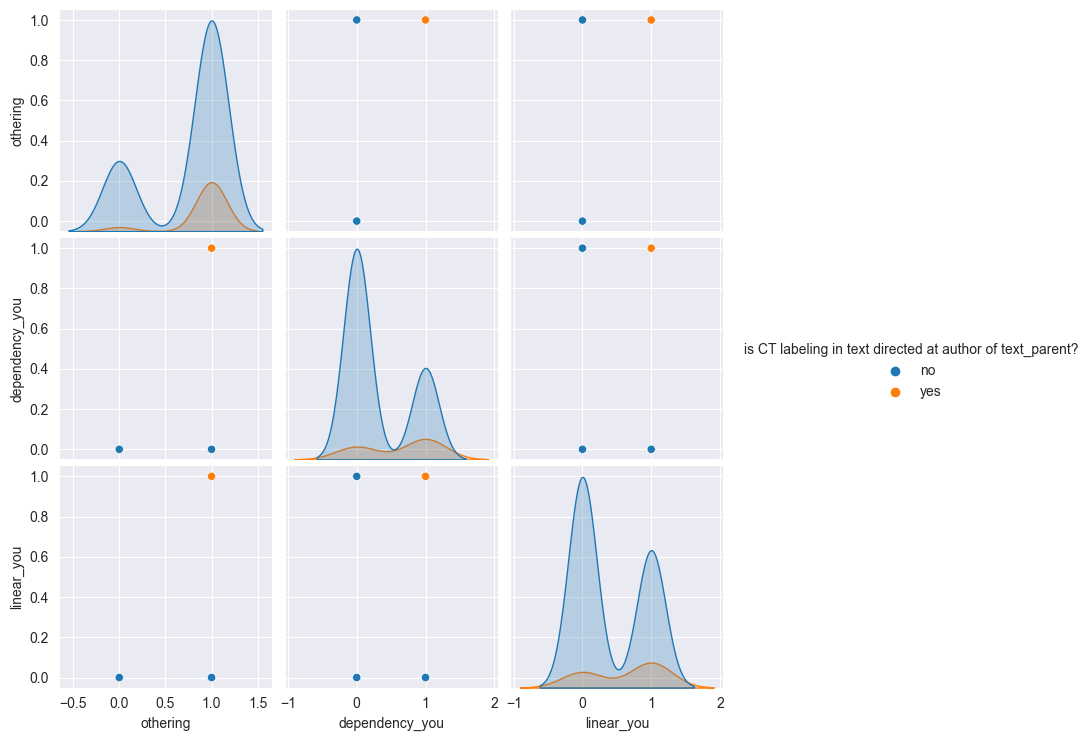

In [122]:
sns.pairplot(df, hue=target, vars=['othering', 'dependency_you', 'linear_you'])

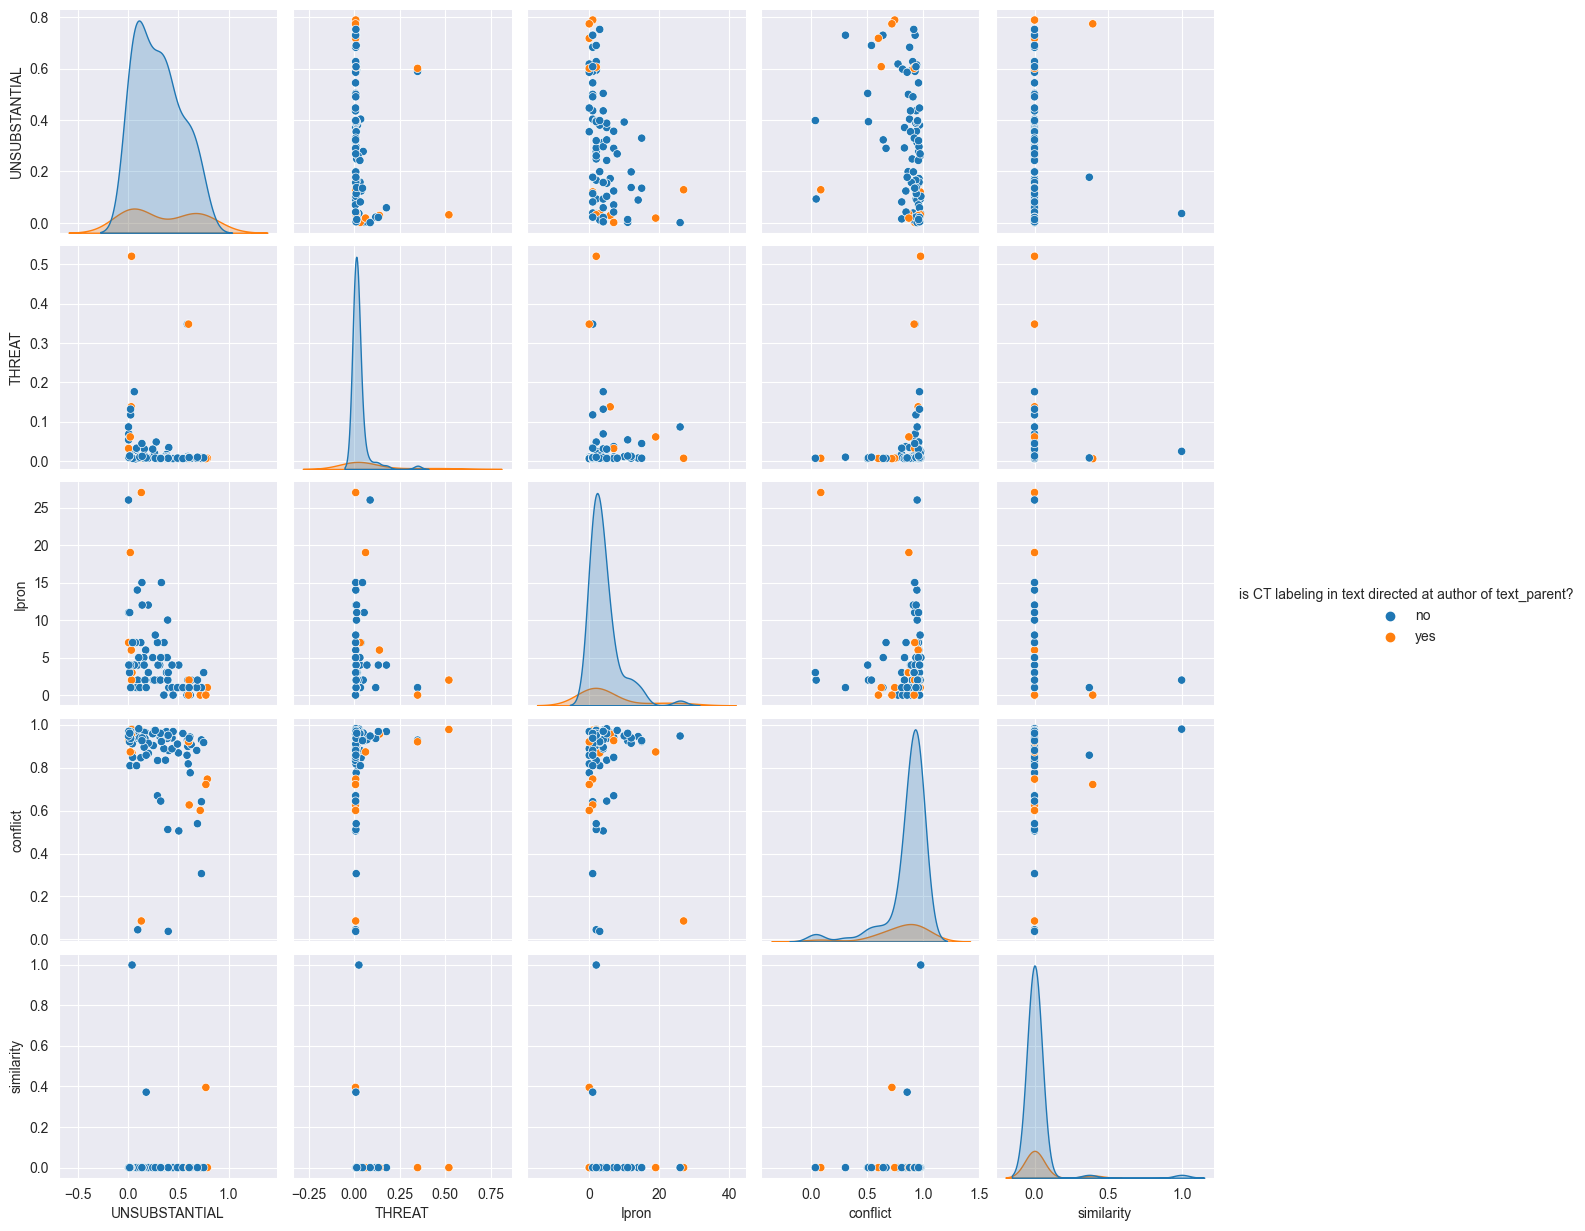

In [123]:
sns.pairplot(df, hue=target, vars=[i[1] for i in feat_importances[:5]])

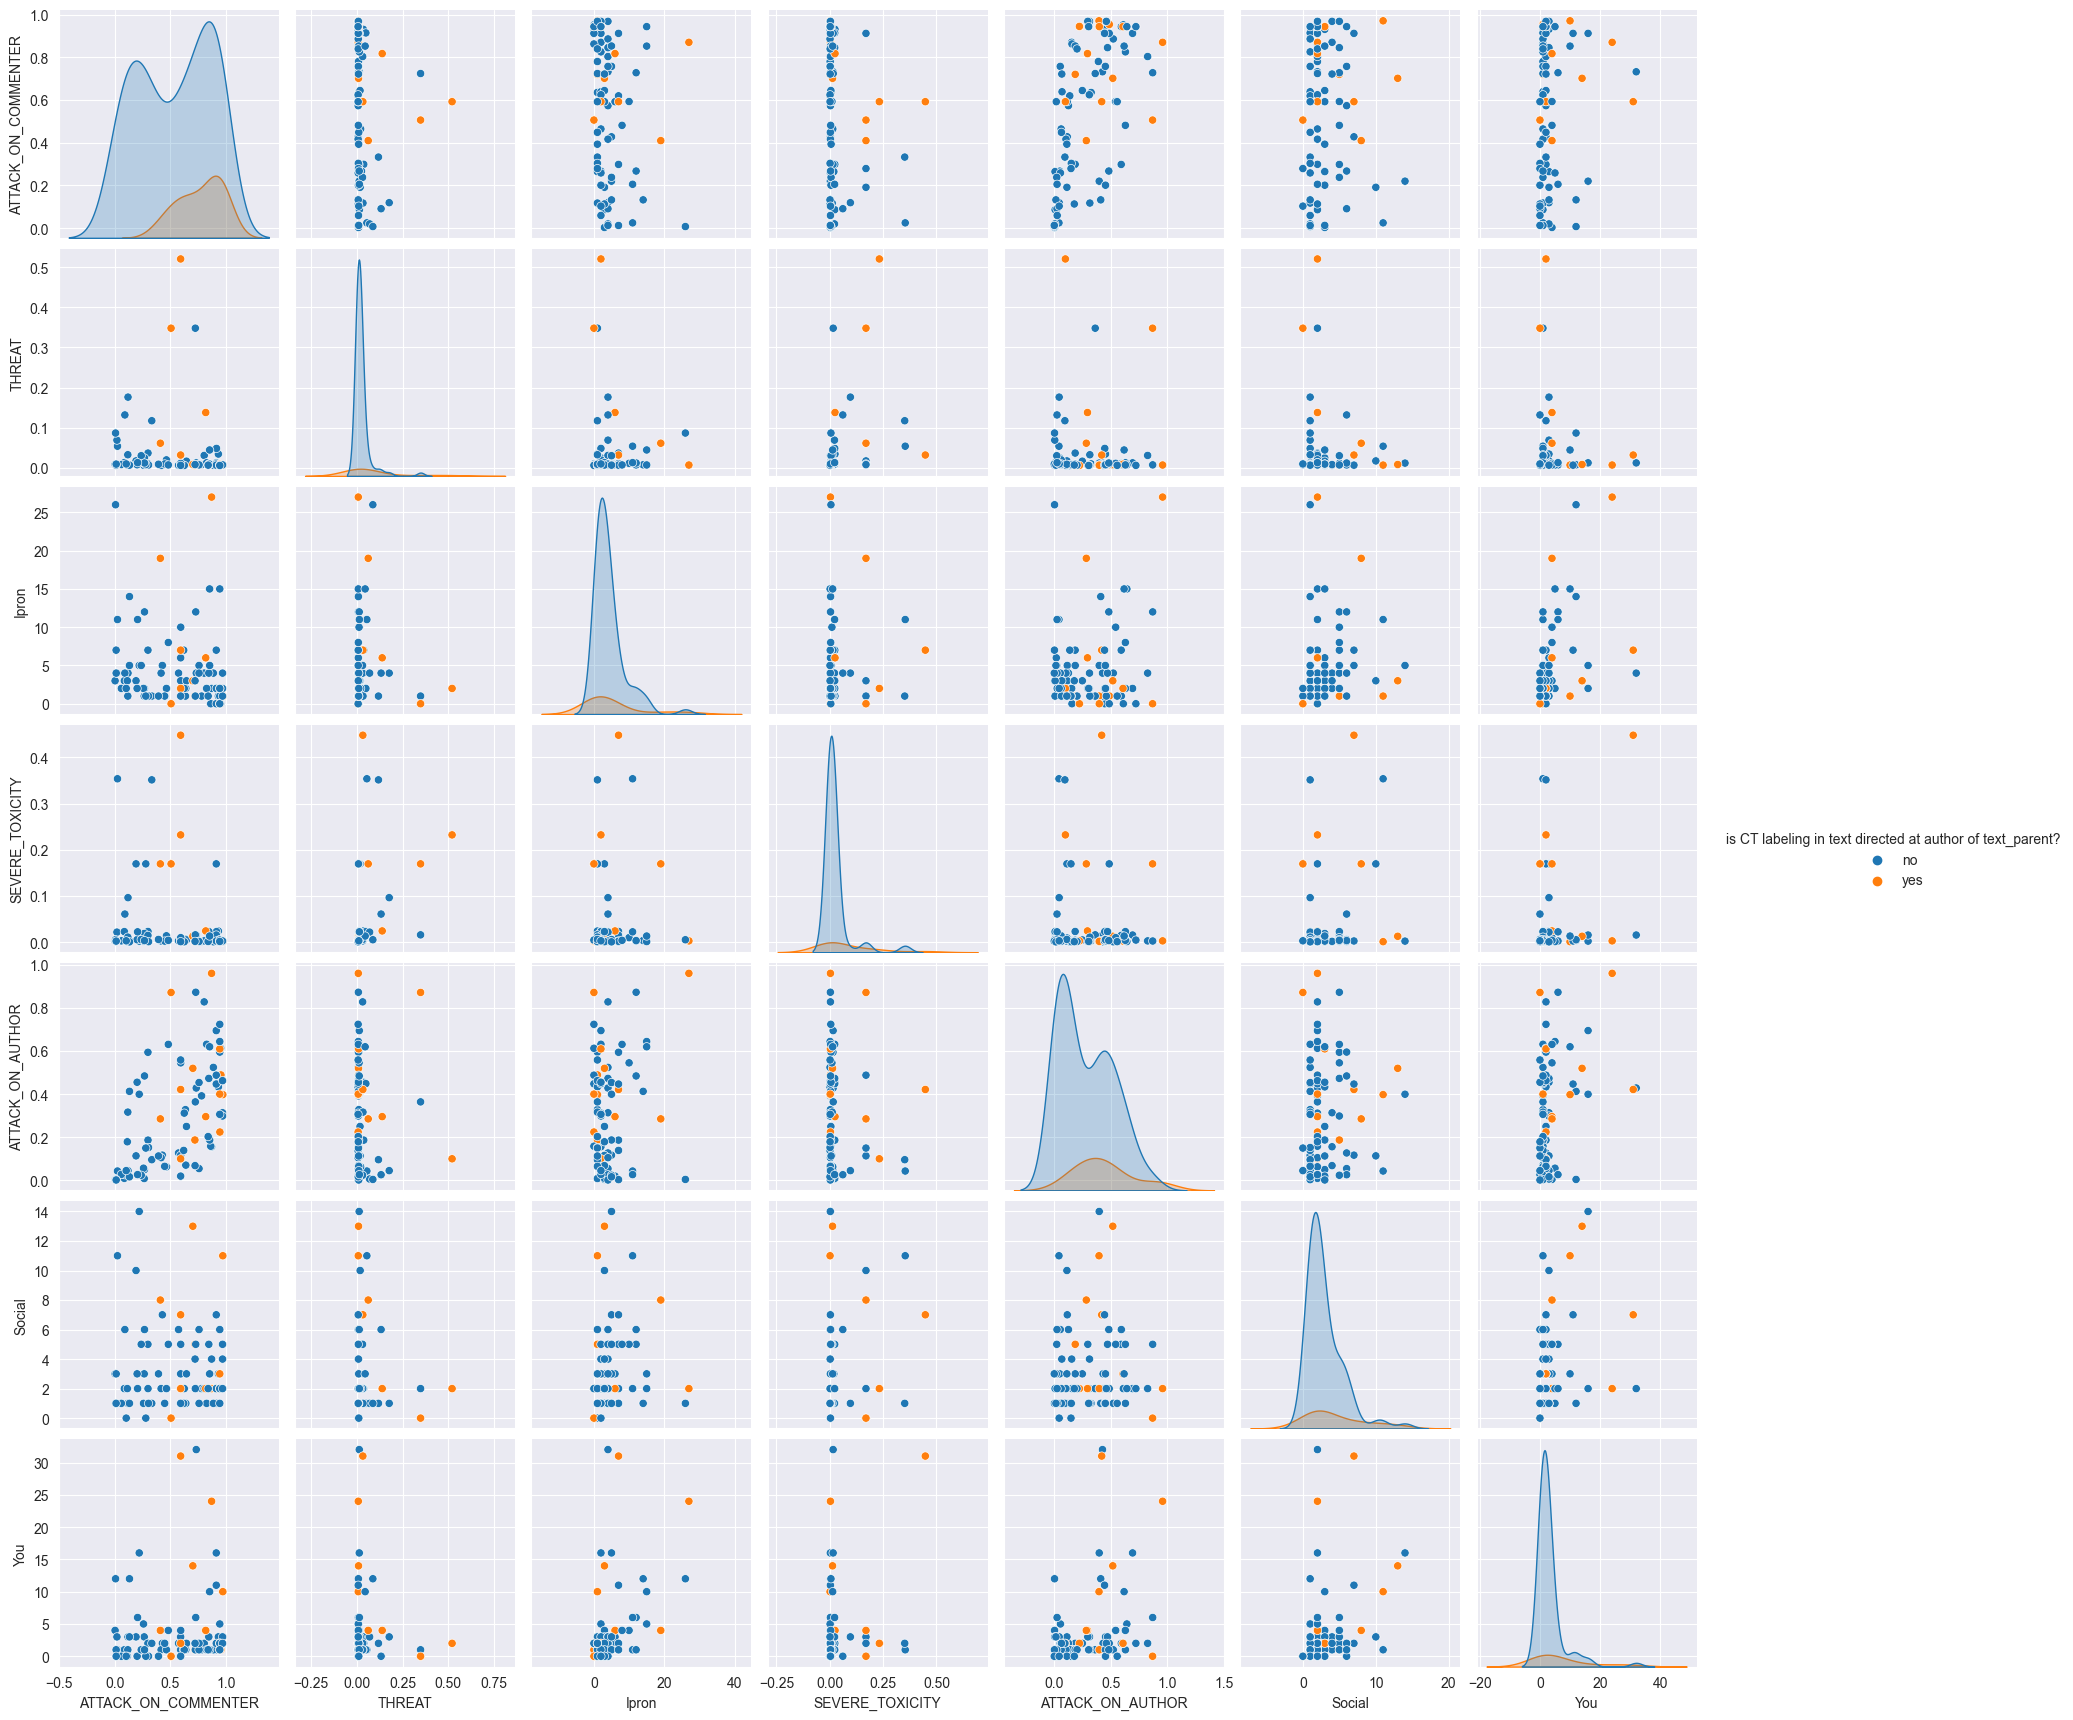

In [124]:
sns.pairplot(df, hue=target, vars=['ATTACK_ON_COMMENTER','THREAT','Ipron','SEVERE_TOXICITY','ATTACK_ON_AUTHOR','Social','You',])


In [125]:

y = df[target]=='yes'
# y = df[target]=='previous poster'
X = df[feats]
# clf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)
clf.fit(X_train, y_train)
feat_importances = sorted(zip(clf.feature_importances_, clf.feature_names_in_), reverse=True)
feat_importances


[(0.20489532019704432, 'Ppron'),
 (0.19167626728110573, 'UNSUBSTANTIAL'),
 (0.17975230414746554, 'Social'),
 (0.17678571428571427, 'OBSCENE'),
 (0.1078396422089707, 'Pronoun'),
 (0.08839285714285713, 'SPAM'),
 (0.05065789473684218, 'Space'),
 (0.0, 'trust'),
 (0.0, 'they'),
 (0.0, 'social_support'),
 (0.0, 'similarity'),
 (0.0, 'romance'),
 (0.0, 'respect'),
 (0.0, 'power'),
 (0.0, 'othering'),
 (0.0, 'male'),
 (0.0, 'linear_you'),
 (0.0, 'knowledge'),
 (0.0, 'identity'),
 (0.0, 'home'),
 (0.0, 'hear'),
 (0.0, 'fun'),
 (0.0, 'friend'),
 (0.0, 'female'),
 (0.0, 'feel'),
 (0.0, 'family'),
 (0.0, 'differ'),
 (0.0, 'dependency_you'),
 (0.0, 'conflict'),
 (0.0, 'You'),
 (0.0, 'Work'),
 (0.0, 'We'),
 (0.0, 'Verb'),
 (0.0, 'Tokens'),
 (0.0, 'Time'),
 (0.0, 'Tentat'),
 (0.0, 'TOXICITY'),
 (0.0, 'THREAT'),
 (0.0, 'Swear'),
 (0.0, 'SheHe'),
 (0.0, 'Sexual'),
 (0.0, 'See'),
 (0.0, 'Sad'),
 (0.0, 'SEXUALLY_EXPLICIT'),
 (0.0, 'SEVERE_TOXICITY'),
 (0.0, 'Risk'),
 (0.0, 'Reward'),
 (0.0, 'Relig'),
 (

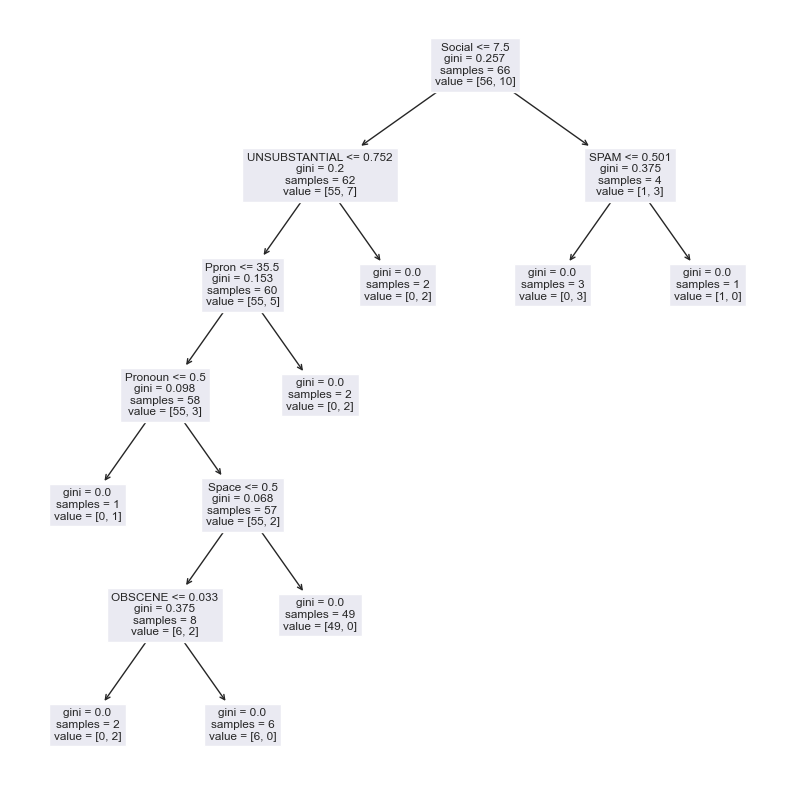

In [126]:
plt.figure(figsize=(10, 10))

_=tree.plot_tree(clf, feature_names=clf.feature_names_in_)

In [127]:
y_pred = clf.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred)

0.6086956521739131

In [128]:
pd.DataFrame(precision_recall_fscore_support(y_true=y_test, y_pred=y_pred),
             index=['precision', 'recall', 'fscore', 'support'],
             columns=['not_prev_commenter', 'prev_commenter'])

,not_prev_commenter,prev_commenter
precision,0.823529,0.0
recall,0.700000,0.0
fscore,0.756757,0.0
support,20.000000,3.0


In [150]:
df.dependency_you

0     False
1     False
2     False
3     False
4     False
      ...  
84    False
85    False
86    False
87    False
88    False
Name: dependency_you, Length: 89, dtype: bool

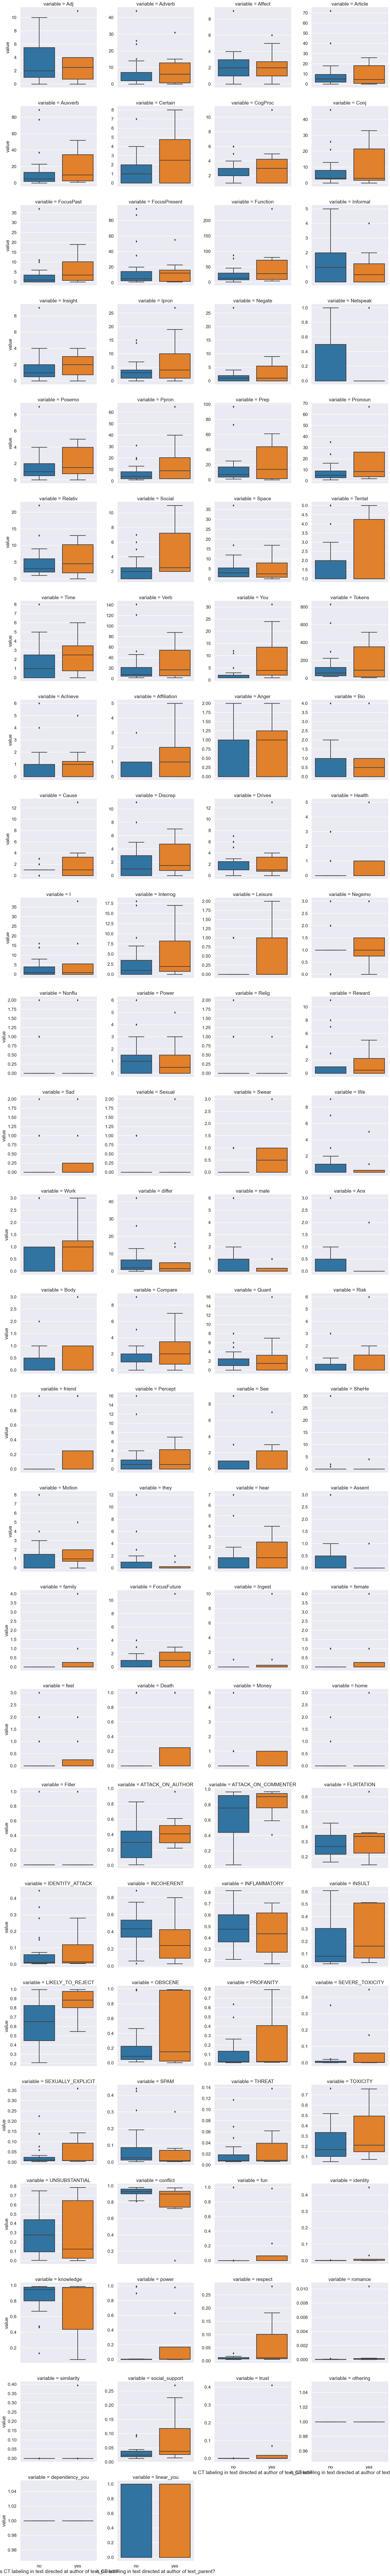

In [151]:
with sns.plotting_context("talk"):
    sns.catplot(
        data=df[df.dependency_you][feats+[target]].melt(id_vars=target),
        y='value',
        col='variable',
        x=target,
        kind='box',
        col_wrap=4,
        sharey=False,
        legend=True,
        )

In [142]:
labeling_contributions = pd.read_json('../data/interim/labeling_contributions_preprocessed_no_bot.jsonl', lines=True, orient='records')

In [143]:
labeling_contributions.head()

,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_text_color,author_flair_type,brand_safe,can_gild,...,replies,selftext,url_overridden_by_dest,quarantined,associated_award,collapsed_because_crowd_control,comment_type,collapsed_reason_code,author_is_blocked,unrepliable_reason
0,1.0,ithkuil,None,None,[],None,None,text,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,LarkinVolpatt,None,None,[],None,None,text,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,cojoco,None,None,[],None,None,text,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,YGOfvn,None,None,[],None,None,text,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,Biff_Bifferson,None,None,[],None,None,text,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
labeling_contributions.tail()

,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_text_color,author_flair_type,brand_safe,can_gild,...,replies,selftext,url_overridden_by_dest,quarantined,associated_award,collapsed_because_crowd_control,comment_type,collapsed_reason_code,author_is_blocked,unrepliable_reason
1169597,0.0,Dessssspaaaacito,None,None,[],None,None,text,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1169598,0.0,xingqitazhu,None,None,[],None,None,text,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1169599,0.0,hdjenfifnfj,None,None,[],None,None,text,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1169600,0.0,Love_Shaq_Baby,,,[],Liberal,dark,text,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1169601,0.0,IDontGetSexualJokes,None,None,[],None,None,text,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
list(labeling_contributions.columns)

['archived',
 'author',
 'author_flair_background_color',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_text',
 'author_flair_text_color',
 'author_flair_type',
 'brand_safe',
 'can_gild',
 'contest_mode',
 'created_utc',
 'distinguished',
 'domain',
 'edited',
 'gilded',
 'hidden',
 'hide_score',
 'is_crosspostable',
 'is_reddit_media_domain',
 'is_self',
 'is_video',
 'link_flair_css_class',
 'link_flair_richtext',
 'link_flair_text',
 'link_flair_text_color',
 'link_flair_type',
 'locked',
 'media',
 'media_embed',
 'no_follow',
 'num_comments',
 'num_crossposts',
 'over_18',
 'parent_whitelist_status',
 'permalink',
 'retrieved_on',
 'rte_mode',
 'score',
 'secure_media',
 'secure_media_embed',
 'send_replies',
 'spoiler',
 'stickied',
 'subreddit',
 'subreddit_id',
 'subreddit_name_prefixed',
 'subreddit_type',
 'suggested_sort',
 'thumbnail',
 'thumbnail_height',
 'thumbnail_width',
 'url',
 'whitelist_status',
 'name',
 'contribution_type',
 'text',
 'fulln

In [149]:
# limit to comments
labeling_contributions= labeling_contributions[labeling_contributions.contribution_type=='comment']